# UEP 239 Final Project
#### Jess Wilson - May 2021

---

### Goal of Project:
- Discover the most suitable zip code tabulation areas (ZCTAs) for young professionals to move to in Metro Boston. 

### ZCTA Suitability Indicator Variables: 
1. Mean rent payment (USD)
2. Population density (population per sq. km)
3. Farmer's markets per capita (farmer's markets per population)
4. Transit stop density (stop per sq. km)
5. Grocery store per capita (grocery stores per population)

---

#### Instructions on How to Run:
- All instructions can be found in the README.md, including how to load and run environment and download necessary datasets 
- Environment (environment.yml) and data directory (uep239-final-project-data) are located in repository

---

#### Importing Relevant Libraries:

In [1]:
import numpy as np               # Load numpy, for scientific computing
import pandas as pd              # Load pandas, for data frame manipulation 
import geopandas as gpd          # Load geopandas, for pandas manipulation with geospatial components
import matplotlib.pyplot as plt  # Load matplotlib, for plotting and mappingdata
import folium                    # Load folium, for interactive maps
import os                        # Load OS, for operating system work
import contextily as cx          # Load contextily, for basemaps

---

#### Setting Working Directory:

In [2]:
# Pass the raw string (r) path of the directory in which you downloaded the project data
os.chdir(os.path.dirname(r"z:/OneDrive/Documentos/GPwP/uep239-final-project/uep239-final-project-data/"))
# Print working directory
print("Path changed to: "+os.getcwd())

Path changed to: z:\OneDrive\Documentos\GPwP\uep239-final-project\uep239-final-project-data


---

#### Read in Relevant Data Sets and Clean Data:



---

**Population:**

In [3]:
# Read in ZCTA population data:
population_raw = pd.read_csv(r"tabular/Population/population.csv", skiprows = [1])

# Observe data:
population_raw.info()
population_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 458 entries, GEO_ID to S0101_C06_038M
dtypes: int64(186), object(272)
memory usage: 1.9+ MB


GEO_ID         NAME  S0101_C01_001E  S0101_C01_001M  \
0  8600000US01001  ZCTA5 01001           17312             735   
1  8600000US01002  ZCTA5 01002           30014             485   
2  8600000US01003  ZCTA5 01003           11357             477   
3  8600000US01005  ZCTA5 01005            5128             404   
4  8600000US01007  ZCTA5 01007           15005              20   

   S0101_C01_002E  S0101_C01_002M  S0101_C01_003E  S0101_C01_003M  \
0             956             233             863             222   
1             872             143            1043             192   
2               0              19               0              19   
3             127              72             199             139   
4             879             183             828             186   

   S0101_C01_004E  S0101_C01_004M  ...  S0101_C06_034E  S0101_C06_034M  \
0             967             274  ...             (X)             (X)   
1            1123             215  ...             (X)             (X)   
2               0              19  ...             (X)             (X)   
3             408             153  ...             (X)             (X)   
4             969             193  ...             (X)             (X)   

   S0101_C06_035E  S0101_C06_035M  S0101_C06_036E  S0101_C06_036M  \
0             (X)             (X)             (X)             (X)   
1             (X)             (X)             (X)             (X)   
2             (X)             (X)             (X)             (X)   
3             (X)             (X)             (X)             (X)   
4             (X)             (X)             (X)             (X)   

   S0101_C06_037E  S0101_C06_037M  S0101_C06_038E  S0101_C06_038M  
0             (X)             (X)             (X)             (X)  
1             (X)             (X)             (X)             (X)  
2             (X)             (X)             (X)             (X)  
3             (X)             (X)             (X)             (X)  
4             (X)             (X)             (X)             (X)  

[5 rows x 458 columns]

In [4]:
# Rename population and name columns:
population_raw.rename(columns = {'S0101_C01_001E' : 'Total_Population', 'NAME' : 'ZCTA'}, inplace = True)

# Remove "ZCTA5" from ZCTA column:
population_raw['ZCTA'] = population_raw['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

# Subset data into only the necessary columns for analysis:
population = population_raw[["ZCTA", "Total_Population"]]
population.head()

ZCTA  Total_Population
0  01001             17312
1  01002             30014
2  01003             11357
3  01005              5128
4  01007             15005

---

**Monthly Rent:**

In [5]:
# Read in median monthly rent data:
rent_raw = pd.read_csv(r"tabular/Rent/rent.csv", skiprows = [1])

# Observe data:
rent_raw.info()
rent_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Columns: 554 entries, GEO_ID to S2503_C06_046M
dtypes: int64(266), object(288)
memory usage: 2.3+ MB


GEO_ID         NAME  S2503_C01_001E  S2503_C01_001M  \
0  8600000US01001  ZCTA5 01001            7413             322   
1  8600000US01002  ZCTA5 01002            9798             451   
2  8600000US01003  ZCTA5 01003              42              42   
3  8600000US01005  ZCTA5 01005            1944             232   
4  8600000US01007  ZCTA5 01007            5563             196   

   S2503_C01_002E  S2503_C01_002M  S2503_C01_003E  S2503_C01_003M  \
0             230             138             163             105   
1             562             198             376             130   
2              24              38               0              19   
3              51              50              27              44   
4              81              65             109             107   

   S2503_C01_004E  S2503_C01_004M  ...  S2503_C06_042E  S2503_C06_042M  \
0             320             113  ...            15.6             6.9   
1             465             212  ...             9.3             3.0   
2              14              20  ...             0.0            49.9   
3              34              50  ...            28.1            29.3   
4             105              90  ...            14.1             7.1   

   S2503_C06_043E  S2503_C06_043M  S2503_C06_044E  S2503_C06_044M  \
0             1.6             1.8             0.0             1.7   
1            10.7             3.7             2.6             2.2   
2             0.0            49.9             0.0            49.9   
3             0.0            12.1             0.0            12.1   
4            13.5            11.0             0.0             3.3   

   S2503_C06_045E  S2503_C06_045M  S2503_C06_046E  S2503_C06_046M  
0             2.1             1.7             7.9             3.5  
1             6.3             3.2             1.1             0.9  
2            63.2            53.3             0.0            49.9  
3             0.0            12.1            17.4            18.0  
4             0.0             3.3             4.6             5.2  

[5 rows x 554 columns]

In [6]:
# Rename rent and name columns:
rent_raw.rename(columns = {"S2503_C05_024E" : "Median_Rent", 'NAME' : 'ZCTA'}, inplace = True)

# Remove "ZCTA5" from ZCTA "NAME" column:
rent_raw['ZCTA'] = rent_raw['ZCTA'].map(lambda x: x.lstrip('ZCTA5 '))

# Replace empty values:
rent_raw = rent_raw.replace('-', np.NaN)

# Change 'Median_Rent' to numeric:
rent_raw["Median_Rent"] = pd.to_numeric(rent_raw["Median_Rent"])

# Subset data into only the necessary columns for analysis:
rent = rent_raw[["ZCTA", "Median_Rent"]]
rent.head()

ZCTA  Median_Rent
0  01001       1148.0
1  01002       1380.0
2  01003          NaN
3  01005        965.0
4  01007        975.0

---

**Grocery Stores:**

In [7]:
# Read in grocery store data:
grocery_raw = pd.read_csv(r"tabular/Supermarkets/supermarkets.csv")

# Observe data:
grocery_raw.info()
grocery_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  274 non-null    object 
 1   Address       274 non-null    object 
 2   City          274 non-null    object 
 3   State         274 non-null    object 
 4   ZIP Code      274 non-null    int64  
 5   Latitude      274 non-null    float64
 6   Longitude     274 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.1+ KB


Company Name             Address        City State  ZIP Code   Latitude  \
0  99 Ranch Market  475 Hancock St # 2      Quincy    MA      2171  42.270653   
1            Big Y      500 Staples Dr  Framingham    MA      1702  42.291206   
2            Big Y   770 Cochituate Rd  Framingham    MA      1701  42.309146   
3            Big Y    348 E Central St    Franklin    MA      2038  42.079076   
4            Big Y   182 Summer St # 1    Kingston    MA      2364  42.011307   

   Longitude  
0 -71.023292  
1 -71.489449  
2 -71.380338  
3 -71.380864  
4 -70.735435

In [8]:
# Subset data into only the necessary columns for analysis:
grocery = grocery_raw[["Company Name", "Address", "Latitude", "Longitude"]]
grocery.head()

Company Name             Address   Latitude  Longitude
0  99 Ranch Market  475 Hancock St # 2  42.270653 -71.023292
1            Big Y      500 Staples Dr  42.291206 -71.489449
2            Big Y   770 Cochituate Rd  42.309146 -71.380338
3            Big Y    348 E Central St  42.079076 -71.380864
4            Big Y   182 Summer St # 1  42.011307 -70.735435

---

**MPO Boundaries:**

In [9]:
# Read in MPO boundary data:
mpo_raw = gpd.read_file(r"vector/MPO_Boundaries/mpo_boundaries.shp")

# Observe data:
mpo_raw.info()
mpo_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    13 non-null     int64   
 1   MPO         13 non-null     object  
 2   created_us  0 non-null      object  
 3   created_da  13 non-null     object  
 4   last_edite  2 non-null      object  
 5   last_edi_1  13 non-null     object  
 6   GlobalID    13 non-null     object  
 7   ShapeSTAre  13 non-null     float64 
 8   ShapeSTLen  13 non-null     float64 
 9   geometry    13 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(6)
memory usage: 1.1+ KB


OBJECTID                    MPO created_us  created_da last_edite  \
0         2              Berkshire       None  1970-01-01       None   
1         3               Cape Cod       None  1970-01-01       None   
2         4  Central Massachusetts       None  1970-01-01       None   
3         5               Franklin       None  1970-01-01       None   
4         6           Montachusett       None  1970-01-01       None   

   last_edi_1                                GlobalID    ShapeSTAre  \
0  1970-01-01  {08FDA544-18B0-412A-B442-287E53E987F7}  2.451015e+09   
1  1970-01-01  {B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01}  1.067067e+09   
2  1970-01-01  {CC777E14-53C8-42AD-B421-71444DA0BB60}  2.487546e+09   
3  1970-01-01  {4804E708-6B89-4A85-9383-BD91F7589981}  1.876456e+09   
4  1970-01-01  {F315DA63-C9CF-40EE-8AA7-5ABA2E1FD528}  1.772355e+09   

     ShapeSTLen                                           geometry  
0  2.471530e+05  POLYGON ((-8128884.676 5272654.345, -8128962.2...  
1  1.288227e+06  MULTIPOLYGON (((-7813968.781 5173329.197, -781...  
2  2.683265e+05  POLYGON ((-7977225.352 5223837.273, -7973861.8...  
3  2.527017e+05  POLYGON ((-8046511.241 5269691.856, -8045276.8...  
4  2.748684e+05  POLYGON ((-7976246.504 5267152.001, -7976121.9...

In [10]:
# Filter MPO to Boston Region MPO:
mpo_raw = mpo_raw[mpo_raw.MPO == "Boston Region"]

# Subset data into only the necessary columns for analysis:
mpo = mpo_raw[["MPO", "geometry"]]
mpo.head()

MPO                                           geometry
10  Boston Region  MULTIPOLYGON (((-7875339.226 5247387.185, -787...

---

**MA Town Boundaries:**

In [11]:
# Read in MA town boundary data:
town_raw = gpd.read_file(r"vector/Town_Boundaries/town_boundaries.shp")

# Observe data:
town_raw.info()
town_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   TOWN        351 non-null    object  
 1   TOWN_ID     351 non-null    int64   
 2   POP1980     351 non-null    int64   
 3   POP1990     351 non-null    int64   
 4   POP2000     351 non-null    int64   
 5   POPCH90_00  351 non-null    int64   
 6   TYPE        351 non-null    object  
 7   FOURCOLOR   351 non-null    int64   
 8   FIPS_STCO   351 non-null    int64   
 9   SUM_ACRES   351 non-null    float64 
 10  SUM_SQUARE  351 non-null    float64 
 11  POP2010     351 non-null    int64   
 12  POPCH00_10  351 non-null    int64   
 13  POPCH80_90  351 non-null    int64   
 14  SHAPE_Leng  351 non-null    float64 
 15  SHAPE_Area  351 non-null    float64 
 16  geometry    351 non-null    geometry
dtypes: float64(4), geometry(1), int64(10), object(2)
memory usage: 46.7+ KB


TOWN  TOWN_ID  POP1980  POP1990  POP2000  POPCH90_00 TYPE  FOURCOLOR  \
0      LOWELL      160    93473   103439   105167        1728    C          4   
1     BEVERLY       30    34575    38195    39862        1667    C          1   
2  GLOUCESTER      107    28092    28716    30273        1557    C          3   
3     CHESTER       59     1182     1280     1308          28    T          4   
4  WINCHESTER      344    20021    20267    20810         543    T          2   

   FIPS_STCO  SUM_ACRES  SUM_SQUARE  POP2010  POPCH00_10  POPCH80_90  \
0      25017   9298.780      14.531   106519        1352        9966   
1      25009   9863.262      15.411    39502        -360        3620   
2      25009  17088.570      26.700    28789       -1484         624   
3      25013  23784.924      37.164     1337          29          98   
4      25017   4062.159       6.347    21374         564         246   

      SHAPE_Leng    SHAPE_Area  \
0   28403.664058  3.763066e+07   
1   38638.706350  3.991521e+07   
2  159379.402958  6.915496e+07   
3   37542.272855  9.625415e+07   
4   19080.564132  1.643902e+07   

                                            geometry  
0  POLYGON ((216431.383 935122.985, 217384.292 93...  
1  MULTIPOLYGON (((247412.633 926932.675, 249132....  
2  MULTIPOLYGON (((264186.563 935044.815, 264207....  
3  POLYGON ((80255.212 900279.565, 84998.072 8998...  
4  POLYGON ((232109.422 913780.365, 231307.063 91...

In [12]:
# Subset data into only the necessary columns for analysis:
town = town_raw[["TOWN", "TOWN_ID", "SHAPE_Leng", "SHAPE_Area", "geometry"]]
town.head()

TOWN  TOWN_ID     SHAPE_Leng    SHAPE_Area  \
0      LOWELL      160   28403.664058  3.763066e+07   
1     BEVERLY       30   38638.706350  3.991521e+07   
2  GLOUCESTER      107  159379.402958  6.915496e+07   
3     CHESTER       59   37542.272855  9.625415e+07   
4  WINCHESTER      344   19080.564132  1.643902e+07   

                                            geometry  
0  POLYGON ((216431.383 935122.985, 217384.292 93...  
1  MULTIPOLYGON (((247412.633 926932.675, 249132....  
2  MULTIPOLYGON (((264186.563 935044.815, 264207....  
3  POLYGON ((80255.212 900279.565, 84998.072 8998...  
4  POLYGON ((232109.422 913780.365, 231307.063 91...

---

**ZCTA Boundaries:**

In [13]:
# Read in ZCTA boundary data:
zcta_raw = gpd.read_file(r"vector/ZCTA_Boundaries/zcta_boundaries.shp")

# Observe data:
zcta_raw.info()
zcta_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   538 non-null    object  
 1   ZCTA5CE10   538 non-null    object  
 2   GEOID10     538 non-null    object  
 3   CLASSFP10   538 non-null    object  
 4   MTFCC10     538 non-null    object  
 5   FUNCSTAT10  538 non-null    object  
 6   ALAND10     538 non-null    int64   
 7   AWATER10    538 non-null    int64   
 8   INTPTLAT10  538 non-null    object  
 9   INTPTLON10  538 non-null    object  
 10  PARTFLG10   538 non-null    object  
 11  geometry    538 non-null    geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 50.6+ KB


STATEFP10 ZCTA5CE10  GEOID10 CLASSFP10 MTFCC10 FUNCSTAT10    ALAND10  \
0        25     02536  2502536        B5   G6350          S   71696166   
1        25     02556  2502556        B5   G6350          S   10034104   
2        25     02540  2502540        B5   G6350          S   27746696   
3        25     02646  2502646        B5   G6350          S    7798581   
4        25     01237  2501237        B5   G6350          S  160121626   

   AWATER10   INTPTLAT10    INTPTLON10 PARTFLG10  \
0   9066635  +41.5969756  -070.5678768         N   
1   1164445  +41.6394454  -070.6245149         N   
2   4550024  +41.5741900  -070.6282848         N   
3    801405  +41.6705961  -070.0714493         N   
4   1140685  +42.5478177  -073.2680327         N   

                                            geometry  
0  POLYGON ((-70.59239 41.56006, -70.59268 41.559...  
1  POLYGON ((-70.62389 41.61673, -70.62633 41.617...  
2  POLYGON ((-70.62389 41.61673, -70.62262 41.616...  
3  POLYGON ((-70.07925 41.67769, -70.07864 41.677...  
4  POLYGON ((-73.23558 42.49333, -73.23587 42.493...

In [14]:
# Rename ZCTA columns:
zcta_raw.rename(columns = {"ZCTA5CE10" : "ZCTA", "ALAND10" : "Area"}, inplace = True)

# Convert area from meters to kilometers
zcta_raw['Area'] = zcta_raw['Area'] / 1000

# Subset data into only the necessary columns for analysis:
zcta = zcta_raw[["ZCTA", "GEOID10", "Area", "geometry"]]
zcta.head()

ZCTA  GEOID10        Area  \
0  02536  2502536   71696.166   
1  02556  2502556   10034.104   
2  02540  2502540   27746.696   
3  02646  2502646    7798.581   
4  01237  2501237  160121.626   

                                            geometry  
0  POLYGON ((-70.59239 41.56006, -70.59268 41.559...  
1  POLYGON ((-70.62389 41.61673, -70.62633 41.617...  
2  POLYGON ((-70.62389 41.61673, -70.62262 41.616...  
3  POLYGON ((-70.07925 41.67769, -70.07864 41.677...  
4  POLYGON ((-73.23558 42.49333, -73.23587 42.493...

---

**Transit Stops:**

In [15]:
# Read in transit stop data:
transit_raw = gpd.read_file(r"vector/Transit_Stops/transit_stops.shp")

# Observe data:
transit_raw.info()
transit_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATION   166 non-null    object  
 1   LINE      166 non-null    object  
 2   TERMINUS  166 non-null    object  
 3   ROUTE     166 non-null    object  
 4   geometry  166 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 6.6+ KB


STATION    LINE TERMINUS  \
0               Ashmont     RED        Y   
1               Harvard     RED        N   
2           Kendall/MIT     RED        N   
3          Capen Street     RED        N   
4  Tufts Medical Center  ORANGE        N   

                                     ROUTE                       geometry  
0                 A - Ashmont  C - Alewife  POINT (236007.538 892693.023)  
1  A - Ashmont  B - Braintree  C - Alewife  POINT (231387.274 902684.016)  
2  A - Ashmont  B - Braintree  C - Alewife  POINT (234087.917 901406.551)  
3                         Mattapan Trolley  POINT (234055.438 890869.375)  
4                Forest Hills to Oak Grove  POINT (235900.324 899934.313)

In [16]:
# Subset data into only the necessary columns for analysis:
transit = transit_raw[["STATION", "LINE", "geometry"]]
transit.head()

STATION    LINE                       geometry
0               Ashmont     RED  POINT (236007.538 892693.023)
1               Harvard     RED  POINT (231387.274 902684.016)
2           Kendall/MIT     RED  POINT (234087.917 901406.551)
3          Capen Street     RED  POINT (234055.438 890869.375)
4  Tufts Medical Center  ORANGE  POINT (235900.324 899934.313)

---

**Farmer's Markets:**

In [17]:
# Read in farmer's markets data:
market_raw = gpd.read_file(r"vector/Farmers_Markets/farmers_markets.shp")

# Observe data:
market_raw.info()
market_raw.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MARKET_ID   301 non-null    float64 
 1   NAME        301 non-null    object  
 2   TYPE        301 non-null    object  
 3   ADDR_1      298 non-null    object  
 4   ADDR_2      280 non-null    object  
 5   TOWN        301 non-null    object  
 6   ZIP_CODE    301 non-null    object  
 7   DAY_TIME    301 non-null    object  
 8   DATES       300 non-null    object  
 9   UPDATE_DAT  301 non-null    object  
 10  YEAR_START  289 non-null    object  
 11  WEBSITE     225 non-null    object  
 12  EBT         160 non-null    object  
 13  WIC_CVV     0 non-null      object  
 14  COUPONS     251 non-null    object  
 15  LONGITUDE   301 non-null    float64 
 16  LATITUDE    301 non-null    float64 
 17  geometry    301 non-null    geometry
dtypes: float64(3), geometry(1), object(14)
mem

MARKET_ID                             NAME             TYPE  \
0      606.0  Sustainable Nantucket/Wednesday  Farmers Markets   
1      607.0   Holden/Market on Main at Jed's  Farmers Markets   
2      535.0                      West Newton  Farmers Markets   
3      538.0                       Plainville  Farmers Markets   
4      539.0             Worcester Art Museum  Farmers Markets   

             ADDR_1                     ADDR_2         TOWN ZIP_CODE  \
0  113 Pleasant St.  Next to Glidden's Seafood    Nantucket    02554   
1      450 Main St.  Jed's Hardware and Garden       Holden    01520   
2        Elm Street      off Washington Street  West Newton    02465   
3  200 South Street            Old Wood School   Plainville    02762   
4     Lancaster St.       Worcester Art Museum    Worcester    01609   

                        DAY_TIME                   DATES UPDATE_DAT  \
0   Wednesday, 3:30 pm - 6:30 pm  July 6 to September 14       2016   
1      Friday, 3:30 pm - 7:00 pm    May 20 to October 28       2016   
2   Saturday, 10:00 am - 2:00 pm    June 18 to October 8       2016   
3     Sunday, 10:00 am - 2:00 pm    May 25 to November 2       2015   
4  Saturdays, 10:00 am - 1:00 pm    July 11 to August 29       2015   

  YEAR_START                                  WEBSITE                EBT  \
0       2016      http://www.sustainablenantucket.org  EBT-SNAP Accepted   
1       2016                                     None               None   
2       2014        http://www.newtonma.gov/gov/parks  EBT-SNAP Accepted   
3       2014  http://www.plainvillefarmersmarket.com/  EBT-SNAP Accepted   
4       2014                                     None               None   

  WIC_CVV                        COUPONS  LONGITUDE  LATITUDE  \
0    None  WIC & Senior Coupons Accepted  -70.09361  41.27301   
1    None                           None  -71.83454  42.33213   
2    None  WIC & Senior Coupons Accepted  -71.22932  42.34906   
3    None  WIC & Senior Coupons Accepted  -71.33843  42.00941   
4    None  WIC & Senior Coupons Accepted  -71.80202  42.27328   

                        geometry  
0  POINT (317843.084 781295.223)  
1  POINT (172428.679 898013.943)  
2  POINT (222302.311 899875.783)  
3  POINT (213383.817 862127.128)  
4  POINT (175085.678 891467.195)

In [18]:
#Change column datatype from float to int
market_raw = market_raw.astype({"MARKET_ID" : int})

# Subset data into only the necessary columns for analysis:
market = market_raw[["MARKET_ID", "NAME", "TOWN", "ZIP_CODE", "LONGITUDE", "LATITUDE"]]
market.head()

MARKET_ID                             NAME         TOWN ZIP_CODE  \
0        606  Sustainable Nantucket/Wednesday    Nantucket    02554   
1        607   Holden/Market on Main at Jed's       Holden    01520   
2        535                      West Newton  West Newton    02465   
3        538                       Plainville   Plainville    02762   
4        539             Worcester Art Museum    Worcester    01609   

   LONGITUDE  LATITUDE  
0  -70.09361  41.27301  
1  -71.83454  42.33213  
2  -71.22932  42.34906  
3  -71.33843  42.00941  
4  -71.80202  42.27328

In [19]:
# Convert market to gpd using lat/lon:
market = gpd.GeoDataFrame(market, geometry=gpd.points_from_xy(market.LONGITUDE, market.LATITUDE))
market.head()

# Set projection to WGS 84:
market = market.set_crs('epsg:4326')

---

#### Data Manipulation, Joining, and Reprojecting:

In [20]:
# Attribute join population and rent to ZCTA:
zcta = zcta.merge(population, on='ZCTA')
zcta = zcta.merge(rent, on='ZCTA')
zcta.head()

ZCTA  GEOID10        Area  \
0  02536  2502536   71696.166   
1  02556  2502556   10034.104   
2  02540  2502540   27746.696   
3  02646  2502646    7798.581   
4  01237  2501237  160121.626   

                                            geometry  Total_Population  \
0  POLYGON ((-70.59239 41.56006, -70.59268 41.559...             19630   
1  POLYGON ((-70.62389 41.61673, -70.62633 41.617...              2499   
2  POLYGON ((-70.62389 41.61673, -70.62262 41.616...              8346   
3  POLYGON ((-70.07925 41.67769, -70.07864 41.677...              2094   
4  POLYGON ((-73.23558 42.49333, -73.23587 42.493...              2488   

   Median_Rent  
0       1438.0  
1       1416.0  
2       1015.0  
3       1339.0  
4       1173.0

In [21]:
# Reproject MPO and ZCTA to MA state plane projected coordinate system (EPSG:26986):
mpo = mpo.to_crs('epsg:26986')
zcta = zcta.to_crs('epsg:26986')

# Spatial join MPO with ZCTA (intersect) :
mpo_zcta = gpd.sjoin(zcta, mpo, how="inner", op='intersects')

#Drop MPO index column:
mpo_zcta.drop('index_right', inplace=True, axis=1)
mpo_zcta.head()

ZCTA  GEOID10       Area  \
17  01905  2501905   9219.345   
18  01904  2501904  11708.211   
20  01930  2501930  67847.425   
21  01915  2501915  39091.336   
22  01921  2501921  61010.486   

                                             geometry  Total_Population  \
17  POLYGON ((243830.175 913871.662, 243877.753 91...             24580   
18  POLYGON ((245713.029 914796.777, 245700.484 91...             17294   
20  POLYGON ((261488.944 931180.988, 261745.067 93...             30162   
21  POLYGON ((250741.171 926889.812, 250787.714 92...             41885   
22  POLYGON ((236132.449 942516.916, 236156.282 94...              8282   

    Median_Rent            MPO  
17       1155.0  Boston Region  
18       1369.0  Boston Region  
20       1185.0  Boston Region  
21       1282.0  Boston Region  
22        870.0  Boston Region

In [22]:
# Convert grocery to gpd using lat/lon:
grocery = gpd.GeoDataFrame(grocery, geometry=gpd.points_from_xy(grocery.Longitude, grocery.Latitude))
grocery.head()

# Set projection to WGS 84:
grocery = grocery.set_crs('epsg:4326')

<AxesSubplot:>

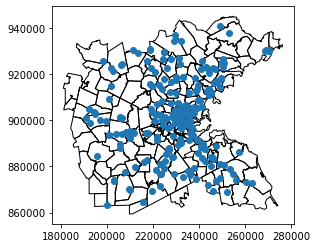

In [23]:
# Reproject grocery stores and farmer's markets into state plane coordinate system:
grocery = grocery.to_crs('epsg:26986')
market = market.to_crs('epsg:26986')

# Clip grocery stores to only include stores in MPO:
grocery = gpd.clip(grocery, mpo_zcta)

# Plot to make sure it worked correctly:
ax = mpo_zcta.plot(facecolor = "none", edgecolor = 'black')
grocery.plot(ax = ax)

<AxesSubplot:>

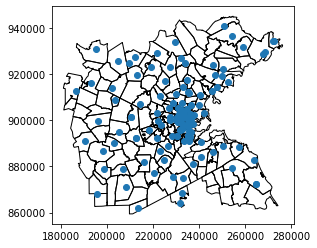

In [24]:
# Clip farmer's markets to only include markets in MPO:
market = gpd.clip(market, mpo_zcta)

# Plot to make sure it worked correctly:
ax = mpo_zcta.plot(facecolor = "none", edgecolor = 'black')
market.plot(ax = ax)

---

#### Creation of Basemap:

Text(0.5, 1.0, 'ZCTA Basemap')

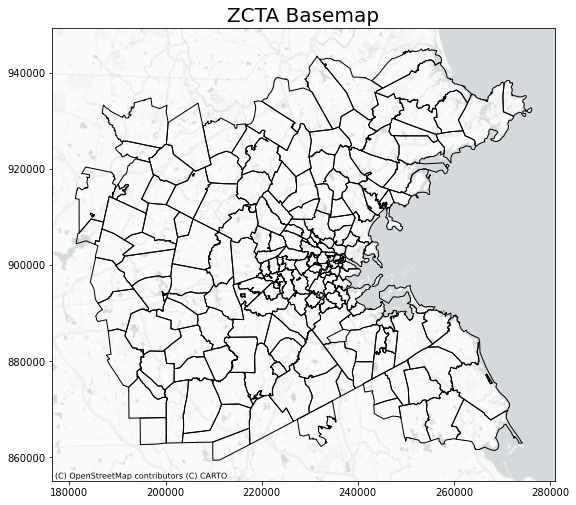

In [25]:
# mpo_zcta + basemap 
ax = mpo_zcta.plot(facecolor = "none", edgecolor = 'black', figsize = (9, 9))
cx.add_basemap(ax, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax.set_title("ZCTA Basemap", fontsize=20)

---

#### Analysis of ZCTA Suitability Indicator Variables:

1. Mean rent payment (USD)
2. Population density (population per sq. km)
3. Farmer's markets per capita (farmer's markets per population)
4. Transit stop density (stop per sq. km)
5. Grocery store per capita (grocery stores per population)

---

**1. Median Rent Payment:**

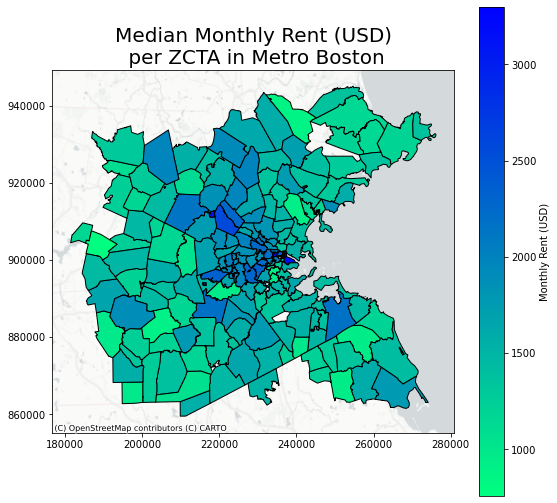

In [26]:
# Indicator variable (median rent per ZCTA) already summarized, so visualize median rent per ZCTA:
ax2 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Median_Rent',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Monthly Rent (USD)"})

cx.add_basemap(ax2, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax2.set_title("Median Monthly Rent (USD)\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [27]:
# Report highest ranking ZCTAs for Median Rent:
mpo_zcta.sort_values('Median_Rent', ascending = False).head()

ZCTA  GEOID10      Area  \
450  02142  2502142   716.170   
391  02210  2502210  2399.614   
231  01731  2501731  2049.705   
118  02109  2502109   449.654   
52   02110  2502110   479.769   

                                              geometry  Total_Population  \
450  POLYGON ((234257.854 901957.176, 234327.174 90...              3676   
391  POLYGON ((236840.995 900200.325, 236796.115 90...              3715   
231  POLYGON ((218695.745 912155.413, 218697.089 91...              2059   
118  POLYGON ((236597.988 900807.986, 236554.100 90...              4190   
52   POLYGON ((236597.988 900807.986, 236616.078 90...              2314   

     Median_Rent            MPO  
450       3301.0  Boston Region  
391       3174.0  Boston Region  
231       3143.0  Boston Region  
118       2974.0  Boston Region  
52        2960.0  Boston Region

In [28]:
# Report lowest ranking ZCTAs for Median Rent (without np.NaNs)
mpo_zcta.dropna().sort_values('Median_Rent', ascending = True).head()

ZCTA  GEOID10       Area  \
533  01503  2501503  33598.202   
22   01921  2501921  61010.486   
451  01746  2501746  48288.456   
184  02119  2502119   4136.145   
495  01906  2501906  27973.350   

                                              geometry  Total_Population  \
533  POLYGON ((192728.167 903499.368, 192620.359 90...              3182   
22   POLYGON ((236132.449 942516.916, 236156.282 94...              8282   
451  POLYGON ((206844.000 880879.735, 206832.270 88...             14724   
184  POLYGON ((235079.178 898127.042, 235115.975 89...             27818   
495  POLYGON ((238864.874 910791.214, 238841.230 91...             28222   

     Median_Rent            MPO  
533        756.0  Boston Region  
22         870.0  Boston Region  
451        897.0  Boston Region  
184        911.0  Boston Region  
495        919.0  Boston Region

In [29]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one using normalize function
def normalize(dfcolumn, min_value, max_value, reverse = False):
    '''
    A function that normalizes scalar numeric data into a 0 to 1 index, with 0 being less desireable and 1 more desireable. 
    Requires numeric dataframe or geopandas dataframe column, minimum value, and maximum value. If lower raw values are more desireable than higher raw values, 'reverse = True' will flip normalized output to reflect this.
    Returns 'factor_score', a list of normalized values.
    '''
    factor_score = []
    for value in dfcolumn:
        normalized_value = (value - min_value) / (max_value - min_value)
        if reverse == True:
            reversed_value = 1 - normalized_value
            factor_score.append(reversed_value)
        else:
            factor_score.append(normalized_value)
    return factor_score

factor_score = normalize(mpo_zcta.Median_Rent, 756.0, 3301.0, reverse = True)
mpo_zcta = mpo_zcta.copy()
mpo_zcta['Rent_Score'] = pd.DataFrame(factor_score)
mpo_zcta.head()

ZCTA  GEOID10       Area  \
17  01905  2501905   9219.345   
18  01904  2501904  11708.211   
20  01930  2501930  67847.425   
21  01915  2501915  39091.336   
22  01921  2501921  61010.486   

                                             geometry  Total_Population  \
17  POLYGON ((243830.175 913871.662, 243877.753 91...             24580   
18  POLYGON ((245713.029 914796.777, 245700.484 91...             17294   
20  POLYGON ((261488.944 931180.988, 261745.067 93...             30162   
21  POLYGON ((250741.171 926889.812, 250787.714 92...             41885   
22  POLYGON ((236132.449 942516.916, 236156.282 94...              8282   

    Median_Rent            MPO  Rent_Score  
17       1155.0  Boston Region    0.743418  
18       1369.0  Boston Region    0.133988  
20       1185.0  Boston Region    0.910413  
21       1282.0  Boston Region    0.664047  
22        870.0  Boston Region    0.611002

---

**2. Population Density:**

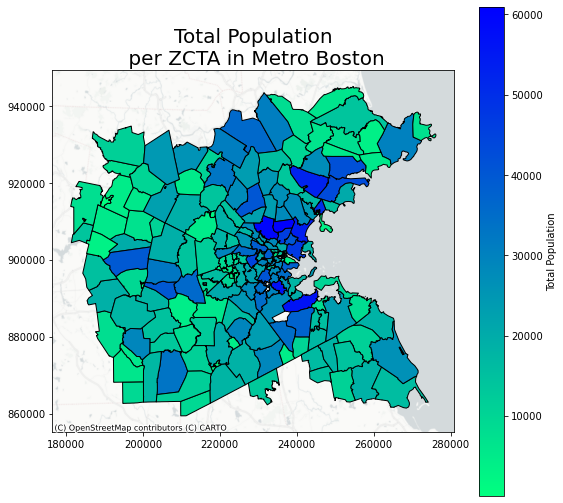

In [30]:
# Visualize spatial data - population per ZCTA:
ax3 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Total_Population',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Total Population"})

cx.add_basemap(ax3, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax3.set_title("Total Population\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [31]:
# Summarize indicator values - population per square km per ZCTA:
mpo_zcta['Population_Density'] = mpo_zcta['Total_Population'] / mpo_zcta['Area']
mpo_zcta.head()

ZCTA  GEOID10       Area  \
17  01905  2501905   9219.345   
18  01904  2501904  11708.211   
20  01930  2501930  67847.425   
21  01915  2501915  39091.336   
22  01921  2501921  61010.486   

                                             geometry  Total_Population  \
17  POLYGON ((243830.175 913871.662, 243877.753 91...             24580   
18  POLYGON ((245713.029 914796.777, 245700.484 91...             17294   
20  POLYGON ((261488.944 931180.988, 261745.067 93...             30162   
21  POLYGON ((250741.171 926889.812, 250787.714 92...             41885   
22  POLYGON ((236132.449 942516.916, 236156.282 94...              8282   

    Median_Rent            MPO  Rent_Score  Population_Density  
17       1155.0  Boston Region    0.743418            2.666133  
18       1369.0  Boston Region    0.133988            1.477083  
20       1185.0  Boston Region    0.910413            0.444556  
21       1282.0  Boston Region    0.664047            1.071465  
22        870.0  Boston Region    0.611002            0.135747

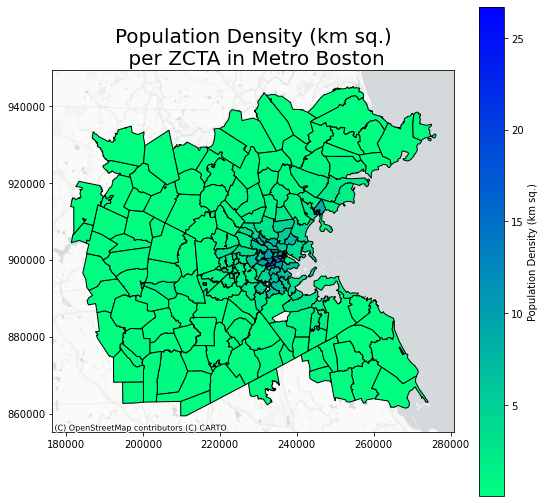

In [32]:
# Visualize pop density per ZCTA:
ax4 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Population_Density',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Population Density (km sq.)"})

cx.add_basemap(ax4, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax4.set_title("Population Density (km sq.)\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [33]:
# Report highest ranking ZCTAs for Population Density:
mpo_zcta.sort_values('Population_Density', ascending = False).head()

ZCTA  GEOID10      Area  \
181  02113  2502113   260.829   
185  02115  2502115  1834.246   
466  02116  2502116  1632.629   
521  02215  2502215  1979.040   
318  02108  2502108   354.836   

                                              geometry  Total_Population  \
181  POLYGON ((236709.574 901967.559, 236727.610 90...              6966   
185  POLYGON ((233791.347 900201.106, 233785.591 90...             28652   
466  POLYGON ((235291.638 900458.961, 235307.593 90...             23157   
521  POLYGON ((230893.478 900182.882, 230882.811 90...             25770   
318  MULTIPOLYGON (((236469.113 901336.715, 236506....              4454   

     Median_Rent            MPO  Rent_Score  Population_Density  
181       1885.0  Boston Region    0.518664           26.707153  
185       1690.0  Boston Region    0.837721           15.620587  
466       1965.0  Boston Region         NaN           14.183872  
521       1991.0  Boston Region         NaN           13.021465  
318       2557.0  Boston Region         NaN           12.552278

In [34]:
# Report lowest ranking ZCTAs for Population Density
mpo_zcta.sort_values('Population_Density', ascending = True).head()

ZCTA  GEOID10       Area  \
256  01467  2501467   4908.783   
533  01503  2501503  33598.202   
254  01451  2501451  49550.919   
128  01740  2501740  51675.247   
210  01929  2501929  36187.007   

                                              geometry  Total_Population  \
256  POLYGON ((189699.221 916172.047, 189771.552 91...               276   
533  POLYGON ((192728.167 903499.368, 192620.359 90...              3182   
254  POLYGON ((192429.746 920743.555, 192446.607 92...              4731   
128  POLYGON ((186938.448 908219.901, 186956.622 90...              5299   
210  POLYGON ((262462.916 932935.940, 262441.205 93...              3745   

     Median_Rent            MPO  Rent_Score  Population_Density  
256          NaN  Boston Region         NaN            0.056226  
533        756.0  Boston Region         NaN            0.094707  
254       1242.0  Boston Region         NaN            0.095478  
128          NaN  Boston Region    0.585855            0.102544  
210       1134.0  Boston Region         NaN            0.103490

In [35]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one
factor_score = normalize(mpo_zcta.Population_Density, 0.056226, 26.707153, reverse = False)
mpo_zcta['Density_Score'] = pd.DataFrame(factor_score)
mpo_zcta.head()

ZCTA  GEOID10       Area  \
17  01905  2501905   9219.345   
18  01904  2501904  11708.211   
20  01930  2501930  67847.425   
21  01915  2501915  39091.336   
22  01921  2501921  61010.486   

                                             geometry  Total_Population  \
17  POLYGON ((243830.175 913871.662, 243877.753 91...             24580   
18  POLYGON ((245713.029 914796.777, 245700.484 91...             17294   
20  POLYGON ((261488.944 931180.988, 261745.067 93...             30162   
21  POLYGON ((250741.171 926889.812, 250787.714 92...             41885   
22  POLYGON ((236132.449 942516.916, 236156.282 94...              8282   

    Median_Rent            MPO  Rent_Score  Population_Density  Density_Score  
17       1155.0  Boston Region    0.743418            2.666133       0.234600  
18       1369.0  Boston Region    0.133988            1.477083       0.178865  
20       1185.0  Boston Region    0.910413            0.444556       0.003224  
21       1282.0  Boston Region    0.664047            1.071465       0.014710  
22        870.0  Boston Region    0.611002            0.135747       0.016396

---

**3. Farmer's Markets Per Capita:**

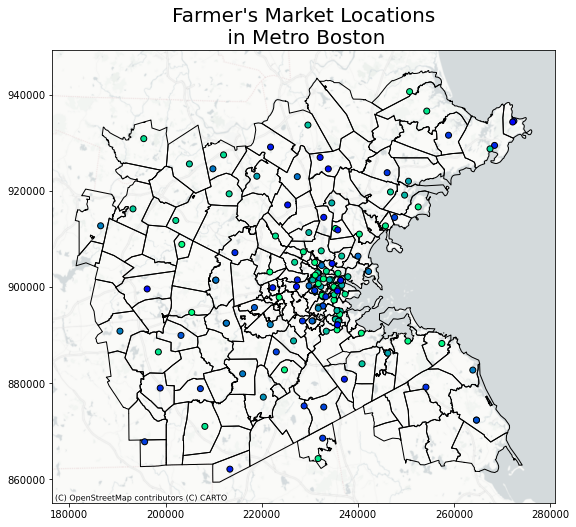

In [36]:
# Visualize spatial data - farmer's market locations:
ax5 = mpo_zcta.plot(facecolor = "none", edgecolor = 'black', figsize = (9,9))
market.plot(ax = ax5,
            column ='MARKET_ID',
            cmap = 'winter_r',
            edgecolor = 'black')

cx.add_basemap(ax5, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax5.set_title("Farmer's Market Locations\n in Metro Boston", fontsize=20)

plt.show()

In [38]:
#Spatial join farmer's markets to ZCTAs:
market_zcta = gpd.sjoin(mpo_zcta, market, how='left', op='contains')
market_zcta['count'] = market_zcta['MARKET_ID'].groupby(market_zcta['ZCTA']).transform('count')

# Get rid of unneccesary data columns:
mpo_zcta = market_zcta[["ZCTA", "Area", "geometry", "Total_Population", "Median_Rent", "Rent_Score", "Population_Density", "Density_Score", "count"]]
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  count  
17       0.234600      0  
18       0.178865      0  
20       0.003224      2  
20       0.003224      2  
21       0.014710      1

In [39]:
# Summarize indicator values - farmer's markets per capita :
mpo_zcta = mpo_zcta.copy()
mpo_zcta['Market_PC'] = mpo_zcta['count'] / mpo_zcta['Total_Population']
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  count  Market_PC  
17       0.234600      0   0.000000  
18       0.178865      0   0.000000  
20       0.003224      2   0.000066  
20       0.003224      2   0.000066  
21       0.014710      1   0.000024

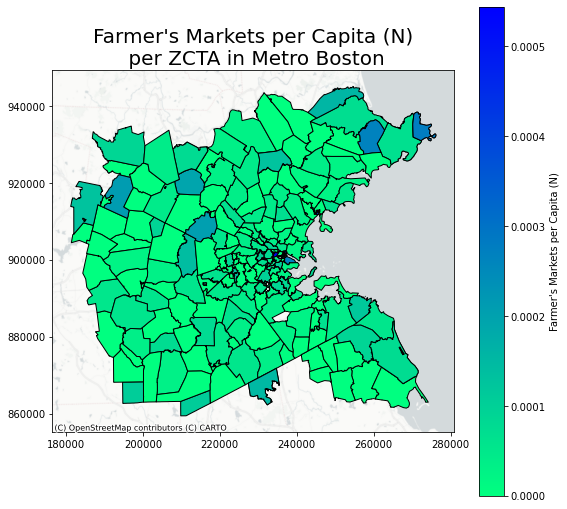

In [40]:
# Visualize farmer's markets per capita per ZCTA
ax6 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Market_PC',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Farmer's Markets per Capita (N)"})

cx.add_basemap(ax6, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax6.set_title("Farmer's Markets per Capita (N)\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [41]:
# Report highest ranking ZCTAs for Farmer's Markets per Capita:
mpo_zcta.sort_values('Market_PC', ascending = False).head()

ZCTA     Area                                           geometry  \
450  02142  716.170  POLYGON ((234257.854 901957.176, 234327.174 90...   
450  02142  716.170  POLYGON ((234257.854 901957.176, 234327.174 90...   
118  02109  449.654  POLYGON ((236597.988 900807.986, 236554.100 90...   
118  02109  449.654  POLYGON ((236597.988 900807.986, 236554.100 90...   
149  01901  641.320  POLYGON ((245392.980 912846.429, 245437.876 91...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
450              3676       3301.0         NaN            5.132860   
450              3676       3301.0         NaN            5.132860   
118              4190       2974.0    0.821611            9.318276   
118              4190       2974.0    0.821611            9.318276   
149              2135        927.0    0.681729            3.329071   

     Density_Score  count  Market_PC  
450            NaN      2   0.000544  
450            NaN      2   0.000544  
118       0.008026      2   0.000477  
118       0.008026      2   0.000477  
149       0.002874      1   0.000468

In [42]:
# Report lowest ranking ZCTAs for Farmer's Markets per Capita:
mpo_zcta.sort_values('Market_PC', ascending = True).head()

ZCTA       Area                                           geometry  \
17   01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
322  01510  14645.926  POLYGON ((181684.694 906113.820, 181760.736 90...   
320  02150   5718.794  POLYGON ((237752.469 905752.993, 237796.372 90...   
319  02136  11887.342  POLYGON ((229308.229 888616.491, 229305.942 88...   
317  02114   1164.209  POLYGON ((236320.545 902013.523, 236336.509 90...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
17              24580       1155.0    0.743418            2.666133   
322             13935       1167.0         NaN            0.951459   
320             39983       1420.0         NaN            6.991509   
319             35213       1306.0         NaN            2.962227   
317             13335       2361.0         NaN           11.454129   

     Density_Score  count  Market_PC  
17          0.2346      0        0.0  
322            NaN      0        0.0  
320            NaN      0        0.0  
319            NaN      0        0.0  
317            NaN      0        0.0

In [43]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one:
factor_score = normalize(mpo_zcta.Market_PC, 0, 2, reverse = False)
mpo_zcta['Market_Score'] = pd.DataFrame(factor_score)
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  count  Market_PC  Market_Score  
17       0.234600      0   0.000000      0.000000  
18       0.178865      0   0.000000      0.000050  
20       0.003224      2   0.000066      0.000014  
20       0.003224      2   0.000066      0.000014  
21       0.014710      1   0.000024      0.000000

In [44]:
# Rename "count" column prior to moving on to next indicator:
mpo_zcta.rename(columns = {"count" : "Market_N"}, inplace = True)
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  Market_N  Market_PC  Market_Score  
17       0.234600         0   0.000000      0.000000  
18       0.178865         0   0.000000      0.000050  
20       0.003224         2   0.000066      0.000014  
20       0.003224         2   0.000066      0.000014  
21       0.014710         1   0.000024      0.000000

---

**4. Transit Stop Density (stop per sq. km):**

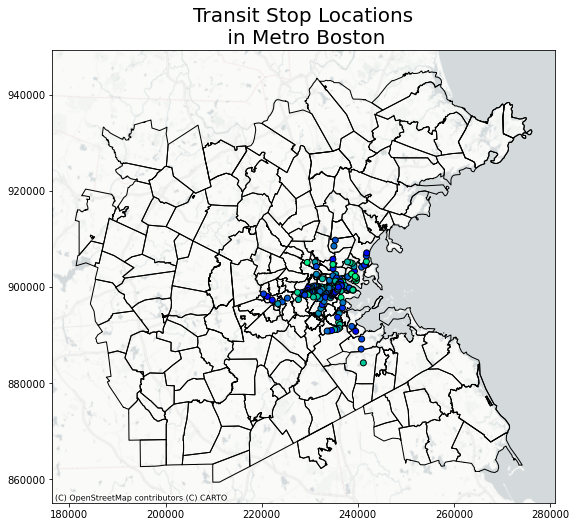

In [45]:
# Visualize spatial data - transit stop locations:
ax7 = mpo_zcta.plot(facecolor = "none", edgecolor = 'black', figsize = (9,9))
transit.plot(ax = ax7,
            column ='STATION',
            cmap = 'winter_r',
            edgecolor = 'black')

cx.add_basemap(ax7, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax7.set_title("Transit Stop Locations\n in Metro Boston", fontsize=20)

plt.show()

In [46]:
#Spatial join transit stops to ZCTAs:
transit_zcta = gpd.sjoin(mpo_zcta, transit, how='left', op='contains')
transit_zcta['count'] = transit_zcta['STATION'].groupby(transit_zcta['ZCTA']).transform('count')

# Get rid of unneccesary data columns:
mpo_zcta = transit_zcta[["ZCTA", "Area", "geometry", "Total_Population", "Median_Rent", "Rent_Score", "Population_Density", "Density_Score", "Market_N", "Market_PC", "Market_Score", "count"]]
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  Market_N  Market_PC  Market_Score  count  
17       0.234600         0   0.000000      0.000000      0  
18       0.178865         0   0.000000      0.000050      0  
20       0.003224         2   0.000066      0.000014      0  
20       0.003224         2   0.000066      0.000014      0  
21       0.014710         1   0.000024      0.000000      0

In [47]:
# Summarize indicator values - stop per square km per ZCTA:
mpo_zcta = mpo_zcta.copy()
mpo_zcta['Transit_Density'] = mpo_zcta['count'] / mpo_zcta['Area']
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  Market_N  Market_PC  Market_Score  count  Transit_Density  
17       0.234600         0   0.000000      0.000000      0              0.0  
18       0.178865         0   0.000000      0.000050      0              0.0  
20       0.003224         2   0.000066      0.000014      0              0.0  
20       0.003224         2   0.000066      0.000014      0              0.0  
21       0.014710         1   0.000024      0.000000      0              0.0

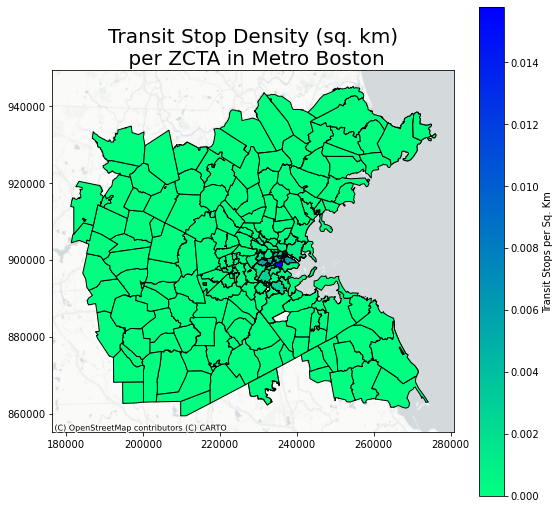

In [48]:
# Visualize transit stop density per ZCTA
ax8 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Transit_Density',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Transit Stops per Sq. Km"})

cx.add_basemap(ax8, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax8.set_title("Transit Stop Density (sq. km)\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [49]:
# Report highest ranking ZCTAs for Transit Stop Density:
mpo_zcta.sort_values('Transit_Density', ascending = False).head()

ZCTA      Area                                           geometry  \
53  02118  2850.698  POLYGON ((234492.912 898353.960, 234474.534 89...   
53  02118  2850.698  POLYGON ((234492.912 898353.960, 234474.534 89...   
53  02118  2850.698  POLYGON ((234492.912 898353.960, 234474.534 89...   
53  02118  2850.698  POLYGON ((234492.912 898353.960, 234474.534 89...   
53  02118  2850.698  POLYGON ((234492.912 898353.960, 234474.534 89...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
53             28262       1286.0    0.511198            9.914063   
53             28262       1286.0    0.511198            9.914063   
53             28262       1286.0    0.511198            9.914063   
53             28262       1286.0    0.511198            9.914063   
53             28262       1286.0    0.511198            9.914063   

    Density_Score  Market_N  Market_PC  Market_Score  count  Transit_Density  
53        0.07926         3   0.000106           0.0     45         0.015786  
53        0.07926         3   0.000106           0.0     45         0.015786  
53        0.07926         3   0.000106           0.0     45         0.015786  
53        0.07926         3   0.000106           0.0     45         0.015786  
53        0.07926         3   0.000106           0.0     45         0.015786

In [50]:
# Report lowest ranking ZCTAs for Transit Stop Density:
mpo_zcta.sort_values('Transit_Density', ascending = True).head()

ZCTA       Area                                           geometry  \
17   01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
243  02047    619.346  POLYGON ((267358.196 875819.198, 267395.076 87...   
245  02199    148.951  POLYGON ((234361.134 899567.393, 234325.760 89...   
250  01747  13392.801  POLYGON ((197033.106 873449.636, 196979.650 87...   
254  01451  49550.919  POLYGON ((192429.746 920743.555, 192446.607 92...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
17              24580       1155.0    0.743418            2.666133   
243                97          NaN         NaN            0.156617   
245              1157       2848.0         NaN            7.767655   
250              5947       1342.0         NaN            0.444045   
254              4731       1242.0         NaN            0.095478   

     Density_Score  Market_N  Market_PC  Market_Score  count  Transit_Density  
17          0.2346         0   0.000000           0.0      0              0.0  
243            NaN         0   0.000000           NaN      0              0.0  
245            NaN         0   0.000000           NaN      0              0.0  
250            NaN         0   0.000000           NaN      0              0.0  
254            NaN         1   0.000211           NaN      0              0.0

In [51]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one:
factor_score = normalize(mpo_zcta.Transit_Density, 0.0, 0.015786, reverse = False)
mpo_zcta['Transit_Score'] = pd.DataFrame(factor_score)
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  Market_N  Market_PC  Market_Score  count  Transit_Density  \
17       0.234600         0   0.000000      0.000000      0              0.0   
18       0.178865         0   0.000000      0.000050      0              0.0   
20       0.003224         2   0.000066      0.000014      0              0.0   
20       0.003224         2   0.000066      0.000014      0              0.0   
21       0.014710         1   0.000024      0.000000      0              0.0   

    Transit_Score  
17       0.000000  
18       0.000000  
20       0.110641  
20       0.110641  
21       0.110641

In [52]:
# Rename "count" column prior to moving on to next indicator:
mpo_zcta.rename(columns = {"count" : "Transit_N"}, inplace = True)
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
21  01915  39091.336  POLYGON ((250741.171 926889.812, 250787.714 92...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   
21             41885       1282.0    0.664047            1.071465   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   
21       0.014710         1   0.000024      0.000000          0   

    Transit_Density  Transit_Score  
17              0.0       0.000000  
18              0.0       0.000000  
20              0.0       0.110641  
20              0.0       0.110641  
21              0.0       0.110641

---

**5. Grocery Store Per Capita:**

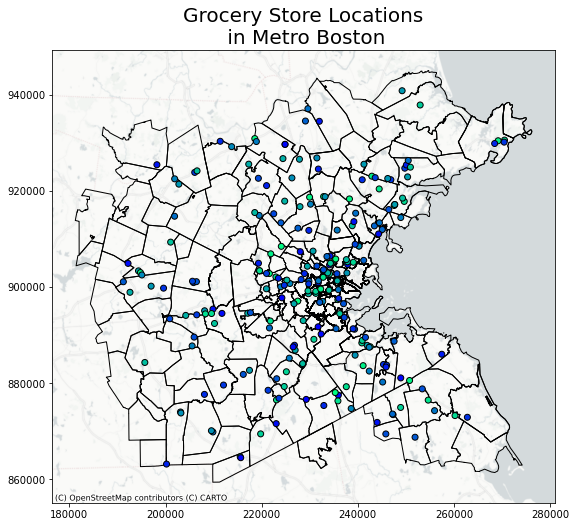

In [53]:
# Visualize spatial data - grocery store locations:
ax9 = mpo_zcta.plot(facecolor = "none", edgecolor = 'black', figsize = (9,9))
grocery.plot(ax = ax9,
             column ='Address',
             cmap = 'winter_r',
             edgecolor = 'black')

cx.add_basemap(ax9, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax9.set_title("Grocery Store Locations\n in Metro Boston", fontsize=20)

plt.show()

In [54]:
#Spatial join grocery stores to ZCTAs:
grocery_zcta = gpd.sjoin(mpo_zcta, grocery, how='left', op='contains')
grocery_zcta['count'] = grocery_zcta['Address'].groupby(grocery_zcta['ZCTA']).transform('count')

# Get rid of unneccesary data columns:
mpo_zcta = grocery_zcta[["ZCTA", "Area", "geometry", "Total_Population", "Median_Rent", "Rent_Score", "Population_Density", "Density_Score", "Market_N", "Market_PC", "Market_Score", "Transit_N", "Transit_Density", "Transit_Score", "count"]]
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   

    Transit_Density  Transit_Score  count  
17              0.0       0.000000      2  
17              0.0       0.000000      2  
18              0.0       0.000000      1  
20              0.0       0.110641      8  
20              0.0       0.110641      8

In [55]:
# Summarize indicator values - grocery stores per capita:
mpo_zcta = mpo_zcta.copy()
mpo_zcta['Grocery_PC'] = mpo_zcta['count'] / mpo_zcta['Total_Population']
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   

    Transit_Density  Transit_Score  count  Grocery_PC  
17              0.0       0.000000      2    0.000081  
17              0.0       0.000000      2    0.000081  
18              0.0       0.000000      1    0.000058  
20              0.0       0.110641      8    0.000265  
20              0.0       0.110641      8    0.000265

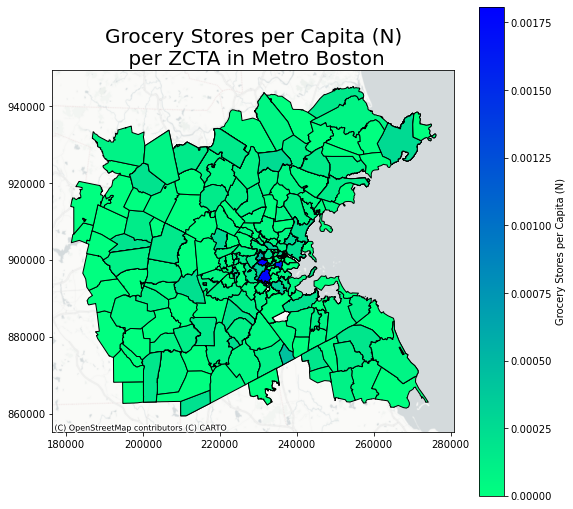

In [56]:
# Visualize grocery stores per capita per ZCTA:
ax10 = mpo_zcta.plot(figsize = (9, 9),
                    column ='Grocery_PC',
                    legend = True,
                    cmap = 'winter_r',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Grocery Stores per Capita (N)"})

cx.add_basemap(ax10, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax10.set_title("Grocery Stores per Capita (N)\n per ZCTA in Metro Boston", fontsize=20)

plt.show()

In [57]:
# Report highest ranking ZCTAs for Grocery Stores per Capita:
mpo_zcta.sort_values('Grocery_PC', ascending = False).head()

ZCTA     Area                                           geometry  \
304  02446  3333.66  POLYGON ((230796.803 900058.050, 230823.582 90...   
304  02446  3333.66  POLYGON ((230796.803 900058.050, 230823.582 90...   
304  02446  3333.66  POLYGON ((230796.803 900058.050, 230823.582 90...   
304  02446  3333.66  POLYGON ((230796.803 900058.050, 230823.582 90...   
304  02446  3333.66  POLYGON ((230796.803 900058.050, 230823.582 90...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
304             29862       2221.0         NaN            8.957722   
304             29862       2221.0         NaN            8.957722   
304             29862       2221.0         NaN            8.957722   
304             29862       2221.0         NaN            8.957722   
304             29862       2221.0         NaN            8.957722   

     Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
304            NaN         2   0.000067           NaN         18   
304            NaN         2   0.000067           NaN         18   
304            NaN         2   0.000067           NaN         18   
304            NaN         2   0.000067           NaN         18   
304            NaN         2   0.000067           NaN         18   

     Transit_Density  Transit_Score  count  Grocery_PC  
304         0.005399       0.343186     54    0.001808  
304         0.005399       0.343186     54    0.001808  
304         0.005399       0.343186     54    0.001808  
304         0.005399       0.343186     54    0.001808  
304         0.005399       0.343186     54    0.001808

In [58]:
# Report lowest ranking ZCTAs for Grocery Stores per Capita:
mpo_zcta.sort_values('Grocery_PC', ascending = True).head()

ZCTA       Area                                           geometry  \
533  01503  33598.202  POLYGON ((192728.167 903499.368, 192620.359 90...   
322  01510  14645.926  POLYGON ((181684.694 906113.820, 181760.736 90...   
318  02108    354.836  MULTIPOLYGON (((236469.113 901336.715, 236506....   
309  02332  61481.268  POLYGON ((266595.619 868745.831, 266617.903 86...   
64   01568  55529.918  POLYGON ((188335.339 880477.761, 188353.694 88...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
533              3182        756.0         NaN            0.094707   
322             13935       1167.0         NaN            0.951459   
318              4454       2557.0         NaN           12.552278   
309             15812       1758.0         NaN            0.257184   
64               7894        984.0    0.633792            0.142158   

     Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
533            NaN         0   0.000000           NaN          0   
322            NaN         0   0.000000           NaN          0   
318            NaN         1   0.000225           NaN          1   
309            NaN         0   0.000000           NaN          0   
64        0.174948         0   0.000000      0.000039          0   

     Transit_Density  Transit_Score  count  Grocery_PC  
533         0.000000            NaN      0         0.0  
322         0.000000       0.002984      0         0.0  
318         0.002818       0.000000      0         0.0  
309         0.000000       0.343186      0         0.0  
64          0.000000       0.999975      0         0.0

In [59]:
# Convert indicator values into suitability score by normalizing values into suitability index ranging from zero to one:
factor_score = normalize(mpo_zcta.Grocery_PC, 0.0, 0.001808, reverse = False)
mpo_zcta['Grocery_Score'] = pd.DataFrame(factor_score)
mpo_zcta.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   

    Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  
17              0.0       0.000000      2    0.000081       0.000000  
17              0.0       0.000000      2    0.000081       0.000000  
18              0.0       0.000000      1    0.000058       0.123732  
20              0.0       0.110641      8    0.000265       0.123732  
20              0.0       0.110641      8    0.000265       0.123732

---

#### Unweighted ZCTA Suitability Index:

- Mean rent payment
- Population density
- Farmer's markets per capita
- Transit stop density
- Grocery stores per capita

In [71]:
# Create unweighted suitability index by summing all indicator scores:
mpo_zcta_final = mpo_zcta.copy()
mpo_zcta_final = mpo_zcta_final.replace(np.NaN, 0)
mpo_zcta_final['Unweighted'] = mpo_zcta_final["Rent_Score"] + mpo_zcta_final["Density_Score"] + mpo_zcta_final["Market_Score"] + mpo_zcta_final["Transit_Score"] + mpo_zcta_final["Grocery_Score"]
mpo_zcta_final.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   

    Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
17              0.0       0.000000      2    0.000081       0.000000   
17              0.0       0.000000      2    0.000081       0.000000   
18              0.0       0.000000      1    0.000058       0.123732   
20              0.0       0.110641      8    0.000265       0.123732   
20              0.0       0.110641      8    0.000265       0.123732   

    Unweighted  
17    0.978018  
17    0.978018  
18    0.436636  
20    1.148025  
20    1.148025

In [67]:
# Report highest ranking ZCTAs for unweighted suitability score:
mpo_zcta_final.sort_values('Unweighted', ascending = False).head()

ZCTA       Area                                           geometry  \
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
43  02169  23235.908  POLYGON ((241068.989 890211.135, 241077.233 89...   
50  02134   3435.273  POLYGON ((231551.083 901256.704, 231551.091 90...   
50  02134   3435.273  POLYGON ((231551.083 901256.704, 231551.091 90...   
50  02134   3435.273  POLYGON ((231551.083 901256.704, 231551.091 90...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
43             56523       1517.0    0.932809            2.432571   
50             19907       1811.0    0.701375            5.794882   
50             19907       1811.0    0.701375            5.794882   
50             19907       1811.0    0.701375            5.794882   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
43       0.122804         0     0.0000      0.000017          2   
50       0.084941         2     0.0001      0.000234          6   
50       0.084941         2     0.0001      0.000234          6   
50       0.084941         2     0.0001      0.000234          6   

    Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000212       0.117424   
43         0.000086       0.999975     12    0.000

In [72]:
# Report lowest ranking ZCTAs for unweighted suitability score:
mpo_zcta_final.sort_values('Unweighted', ascending = True).head()

ZCTA       Area                                           geometry  \
315  02124   7777.026  POLYGON ((234466.034 892266.261, 234457.750 89...   
315  02124   7777.026  POLYGON ((234466.034 892266.261, 234457.750 89...   
315  02124   7777.026  POLYGON ((234466.034 892266.261, 234457.750 89...   
476  01523  65263.989  POLYGON ((182019.154 912405.029, 182018.953 91...   
495  01906  27973.350  POLYGON ((238864.874 910791.214, 238841.230 91...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
315             56649       1507.0         0.0            7.284147   
315             56649       1507.0         0.0            7.284147   
315             56649       1507.0         0.0            7.284147   
476              7794          0.0         0.0            0.119423   
495             28222        919.0         0.0            1.008889   

     Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
315            0.0         5   0.000088           0.0         20   
315            0.0         5   0.000088           0.0         20   
315            0.0         5   0.000088           0.0         20   
476            0.0         1   0.000128           0.0          0   
495            0.0         1   0.000035           0.0          0   

     Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
315         0.002572            0.0     20    0.000353            0.0   
315         0.002572            0.0     20    0.000353            0.0   
315         0.002572            0.0     20    0.000353            0.0   
476         0.000000            0.0      0    0.000000            0.0   
495         0.000000            0.0      3    0.000106            0.0   

     Unweighted  
315         0.0  
315         0.0  
315         0.0  
476         0.0  
495         0.0

In [74]:
# Convert unweighted values into suitability score by normalizing values into suitability index ranging from zero to one:
factor_score = normalize(mpo_zcta_final.Unweighted, 0.0, 2.173030, reverse = False)
mpo_zcta_final['Unweighted_Score'] = pd.DataFrame(factor_score)
mpo_zcta_final.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   

    Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
17              0.0       0.000000      2    0.000081       0.000000   
17              0.0       0.000000      2    0.000081       0.000000   
18              0.0       0.000000      1    0.000058       0.123732   
20              0.0       0.110641      8    0.000265       0.123732   
20              0.0       0.110641      8    0.000265       0.123732   

    Unweighted  Unweighted_Score  
17    0.978018          0.949860  
17    0.978018          0.949860  
18    0.436636          0.925977  
20    1.148025          0.925977  
20    1.148025          0.925977

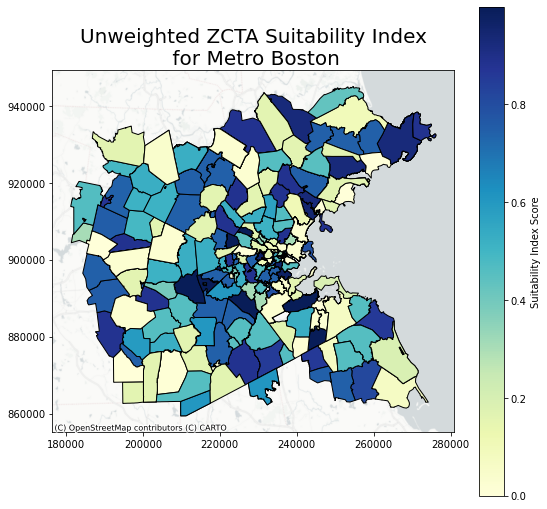

In [95]:
# Visualize unweighted suitability index:
ax11 = mpo_zcta_final.plot(figsize = (9, 9),
                    column ='Unweighted_Score',
                    legend = True,
                    cmap = 'YlGnBu',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Suitability Index Score"})

cx.add_basemap(ax11, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax11.set_title("Unweighted ZCTA Suitability Index\n for Metro Boston", fontsize=20)

plt.show()

---

#### Weighted ZCTA Suitability Index:

- Mean rent payment = 47.5%
- Population density = 6.5%
- Farmer's markets per capita = 3.3%
- Transit stop density = 13.5%
- Grocery stores per capita = 29.2%

*Weights attributed using AHP method: https://bpmsg.com/ahp/ahp-calc.php*


In [85]:
# Create weighted suitability index by summing all indicator scores and multiplying by weights:
mpo_zcta_final['Weighted'] = mpo_zcta_final["Rent_Score"] * 0.475 + mpo_zcta_final["Density_Score"] * 0.065 + mpo_zcta_final["Market_Score"] * 0.033 + mpo_zcta_final["Transit_Score"] * 0.135 + mpo_zcta_final["Grocery_Score"] * 0.292
mpo_zcta_final.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
17       0.234600         0   0.000000      0.000000          0   
17       0.234600         0   0.000000      0.000000          0   
18       0.178865         0   0.000000      0.000050          0   
20       0.003224         2   0.000066      0.000014          0   
20       0.003224         2   0.000066      0.000014          0   

    Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
17              0.0       0.000000      2    0.000081       0.000000   
17              0.0       0.000000      2    0.000081       0.000000   
18              0.0       0.000000      1    0.000058       0.123732   
20              0.0       0.110641      8    0.000265       0.123732   
20              0.0       0.110641      8    0.000265       0.123732   

    Unweighted  Unweighted_Score  Weighted  
17    0.978018          0.949860  0.368373  
17    0.978018          0.949860  0.368373  
18    0.436636          0.925977  0.111402  
20    1.148025          0.925977  0.483722  
20    1.148025          0.925977  0.483722

In [86]:
# Report highest ranking ZCTAs for unweighted suitability score:
mpo_zcta_final.sort_values('Weighted', ascending = False).head()

ZCTA      Area                                           geometry  \
185  02115  1834.246  POLYGON ((233791.347 900201.106, 233785.591 90...   
185  02115  1834.246  POLYGON ((233791.347 900201.106, 233785.591 90...   
185  02115  1834.246  POLYGON ((233791.347 900201.106, 233785.591 90...   
185  02115  1834.246  POLYGON ((233791.347 900201.106, 233785.591 90...   
185  02115  1834.246  POLYGON ((233791.347 900201.106, 233785.591 90...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
185             28652       1690.0    0.837721           15.620587   
185             28652       1690.0    0.837721           15.620587   
185             28652       1690.0    0.837721           15.620587   
185             28652       1690.0    0.837721           15.620587   
185             28652       1690.0    0.837721           15.620587   

     Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
185       0.009319         1   0.000035      0.000064          9   
185       0.009319         1   0.000035      0.000064          9   
185       0.009319         1   0.000035      0.000064          9   
185       0.009319         1   0.000035      0.000064          9   
185       0.009319         1   0.000035      0.000064          9   

     Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
185         0.004907       0.074263      9    0.000314       0.977276   
185         0.004907       0.074263      9    0.000314       0.977276   
185         0.004907       0.074263      9    0.000314       0.977276   
185         0.004907       0.074263      9    0.000314       0.977276   
185         0.004907       0.074263      9    0.000314       0.977276   

     Unweighted  Unweighted_Score  Weighted  
185    1.898643          0.742844  0.693915  
185    1.898643          0.742844  0.693915  
185    1.898643          0.742844  0.693915  
185    1.898643          0.742844  0.693915  
185    1.898643          0.742844  0.693915

In [87]:
# Report lowest ranking ZCTAs for unweighted suitability score:
mpo_zcta_final.sort_values('Weighted', ascending = True).head()

ZCTA      Area                                           geometry  \
509  02143  3981.832  POLYGON ((232063.965 903532.464, 232015.086 90...   
320  02150  5718.794  POLYGON ((237752.469 905752.993, 237796.372 90...   
320  02150  5718.794  POLYGON ((237752.469 905752.993, 237796.372 90...   
320  02150  5718.794  POLYGON ((237752.469 905752.993, 237796.372 90...   
320  02150  5718.794  POLYGON ((237752.469 905752.993, 237796.372 90...   

     Total_Population  Median_Rent  Rent_Score  Population_Density  \
509             25327       1835.0         0.0            6.360640   
320             39983       1420.0         0.0            6.991509   
320             39983       1420.0         0.0            6.991509   
320             39983       1420.0         0.0            6.991509   
320             39983       1420.0         0.0            6.991509   

     Density_Score  Market_N  Market_PC  Market_Score  Transit_N  \
509            0.0         2   0.000079           0.0          0   
320            0.0         0   0.000000           0.0          4   
320            0.0         0   0.000000           0.0          4   
320            0.0         0   0.000000           0.0          4   
320            0.0         0   0.000000           0.0          4   

     Transit_Density  Transit_Score  count  Grocery_PC  Grocery_Score  \
509         0.000000            0.0      8    0.000316            0.0   
320         0.000699            0.0     12    0.000300            0.0   
320         0.000699            0.0     12    0.000300            0.0   
320         0.000699            0.0     12    0.000300            0.0   
320         0.000699            0.0     12    0.000300            0.0   

     Unweighted  Unweighted_Score  Weighted  
509         0.0          0.076391       0.0  
320         0.0          0.306371       0.0  
320         0.0          0.306371       0.0  
320         0.0          0.306371       0.0  
320         0.0          0.306371       0.0

In [89]:
# Convert unweighted values into suitability score by normalizing values into suitability index ranging from zero to one:
factor_score = normalize(mpo_zcta_final.Weighted, 0.0, 0.693915, reverse = False)
mpo_zcta_final['Weighted_Score'] = pd.DataFrame(factor_score)
mpo_zcta_final.head()

ZCTA       Area                                           geometry  \
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
17  01905   9219.345  POLYGON ((243830.175 913871.662, 243877.753 91...   
18  01904  11708.211  POLYGON ((245713.029 914796.777, 245700.484 91...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   
20  01930  67847.425  POLYGON ((261488.944 931180.988, 261745.067 93...   

    Total_Population  Median_Rent  Rent_Score  Population_Density  \
17             24580       1155.0    0.743418            2.666133   
17             24580       1155.0    0.743418            2.666133   
18             17294       1369.0    0.133988            1.477083   
20             30162       1185.0    0.910413            0.444556   
20             30162       1185.0    0.910413            0.444556   

    Density_Score  Market_N  Market_PC  ...  Transit_N  Transit_Density  \
17       0.234600         0   0.000000  ...          0              0.0   
17       0.234600         0   0.000000  ...          0              0.0   
18       0.178865         0   0.000000  ...          0              0.0   
20       0.003224         2   0.000066  ...          0              0.0   
20       0.003224         2   0.000066  ...          0              0.0   

    Transit_Score  count  Grocery_PC  Grocery_Score  Unweighted  \
17       0.000000      2    0.000081       0.000000    0.978018   
17       0.000000      2    0.000081       0.000000    0.978018   
18       0.000000      1    0.000058       0.123732    0.436636   
20       0.110641      8    0.000265       0.123732    1.148025   
20       0.110641      8    0.000265       0.123732    1.148025   

    Unweighted_Score  Weighted  Weighted_Score  
17          0.949860  0.368373        0.874728  
17          0.949860  0.368373        0.874728  
18          0.925977  0.111402        0.735909  
20          0.925977  0.483722        0.735909  
20          0.925977  0.483722        0.735909  

[5 rows x 21 columns]

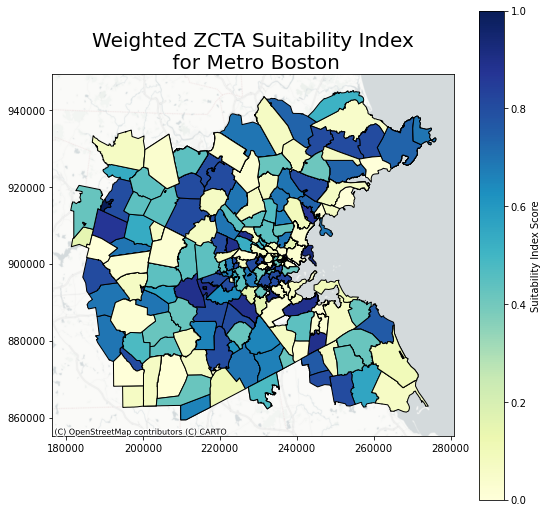

In [94]:
# Visualize unweighted suitability index:
ax12 = mpo_zcta_final.plot(figsize = (9, 9),
                    column ='Weighted_Score',
                    legend = True,
                    cmap = 'YlGnBu',
                    edgecolor = 'black',
                    legend_kwds = {'label' : "Suitability Index Score"})

cx.add_basemap(ax12, crs = mpo_zcta.crs, source=cx.providers.CartoDB.PositronNoLabels)
ax12.set_title("Weighted ZCTA Suitability Index\n for Metro Boston", fontsize=20)

plt.show()